<a href="https://colab.research.google.com/github/MehediNoor911/NumPy/blob/main/ID_2030921_Md_Mehedi_Hasan_Lab_Test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Answer of Question 1:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#drive mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#changing the current directory
%cd drive/MyDrive/data
!ls

/content/drive/MyDrive/data
 Admission_Predict.csv	 Dog			        PetImagesSmall.zip
 bookprice.csv		'gray_Lenna_(test_image).png'   rainfall_data.csv
 Cat			'Lenna_(test_image).png'        seeds_dataset.csv


In [9]:
#read the Admission_Predict.csv file
data = pd.read_csv("Admission_Predict.csv")
#print(data)
print(data.columns) #show column's titles

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [10]:
a = data["GRE Score"].to_numpy() #GRE score's data push in a variable as numPy array
b = data["Chance of Admit "].to_numpy() #Chance of Admit's data push in a variable as numPy array
# print(type(a))
# print(b)

In [11]:
coefficient = np.polyfit(a, b, 1) # return list of cofficients in reverse

In [12]:
def f(x):
  return coefficient[1] + coefficient[0]*x #linear function

In [13]:
a_mean = np.sum(a)/a.size
b_mean = np.sum(b)/b.size

a_demean = a - a_mean
b_demean = b - b_mean

In [14]:
b_pred = f(a)
error = b - b_pred

SSE = np.dot(error, error)
SST = np.dot(b_demean, b_demean)

MSE = SSE/b_pred.size #calculate Mean Squared Error
r_squared = 1 - SSE/SST #calculate r^2 to understand how properly data fit

print(f"Mean Squared Error: {MSE}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 0.007218297991867959
R-squared: 0.6441835498438335


290 340


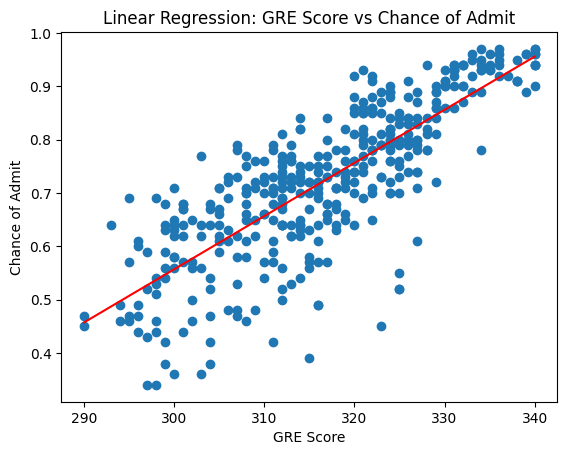

In [ ]:
min_point= np.min(a)
max_point= np.max(a)
x = np.linspace(min_point, max_point, 100)
y = f(x)
plt.scatter(a, b)
plt.plot(x, y, "r")
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.title('Linear Regression: GRE Score vs Chance of Admit')
plt.show()

##Answer of Question 2:

In [21]:
data_in_array = data.to_numpy()
new_data_in_array = data_in_array[:, 1:]
#print(new_data_in_array)
np.random.shuffle(new_data_in_array)
new_data_in_array.shape
#print(data_in_array)

(400, 8)

In [22]:
features = new_data_in_array[:, :-1]
labels = new_data_in_array[:, -1]

print("Features shape:", features.shape)
print("Labels shape:", labels.shape)
# print(features)
# print(labels)

Features shape: (400, 7)
Labels shape: (400,)


In [26]:
min_values = np.min(features, axis=0)
max_values = np.max(features, axis=0)
print(min_values)
print(max_values)

[290.   92.    1.    1.    1.    6.8   0. ]
[340.   120.     5.     5.     5.     9.92   1.  ]


In [27]:
def data_normalization(M):
  return (M - min_values) / (max_values - min_values)

In [ ]:
normalized_features = data_normalization(features)
print(normalized_features)

In [29]:
train_size = int(0.75 * len(normalized_features))

train_features, test_features = np.split(normalized_features, [train_size], axis=0)
train_labels, test_labels = np.split(labels, [train_size], axis=0)

train_features.shape, train_labels.shape, test_features.shape, test_labels.shape

((300, 7), (300,), (100, 7), (100,))

In [46]:
def euclidean_distance(features, train_features):
  return np.sqrt((features-train_features)**2)

In [113]:
def k_nearest_neighbors(features, train_features, train_labels, k=1):
  distances = np.average(euclidean_distance(features, train_features), axis = 1)
  sorted_indices = np.argsort(distances)
  return train_labels[sorted_indices[:k]]


In [114]:
i =15
K_closest_labels = k_nearest_neighbors(test_features[i], train_features, train_labels, k=3)
print(K_closest_labels)
sum = 0
for i in range(len(K_closest_labels)):
  if K_closest_labels[i] > 0.5:
    sum = sum + 1
if sum > len(K_closest_labels)/2:
  print("Chance of Admission: High")
else:
  print("Chance of Admission: Low")



[0.59 0.73 0.84]
Chance of Admission: High


###a

In [117]:
def predict(features, train_features, train_labels, k=1):
    predicted_labels = np.empty(len(features))
    for i, new_features in enumerate(features):
        predicted_labels[i] = k_nearest_neighbors(new_features, train_features, train_labels)
    return predicted_labels

In [ ]:
predicted_labels = predict(test_features, train_features, train_labels, k=3)
for i in range(len(test_features)):
    print("Actual Chance of Admit:", test_labels[i], "Predicted Chance of Admit:", predicted_labels[i])

In [119]:
def accuracy(predicted_labels, test_labels):
    correct_predictions = np.sum(predicted_labels == test_labels)
    total_test_labels = len(test_labels)
    accuracy = correct_predictions / total_test_labels
    #print(correct_predictions, total_test_labels)
    return accuracy

In [120]:
acc = accuracy(predicted_labels, test_labels)
print("Accuracy of the model :", acc)

Accuracy of the model : 0.08


###b

In [ ]:
k_values = [3, 5, 7, 9]
accuracies = []
for k in k_values:
  predicted_labels = predict(test_features, train_features, train_labels, k=i)
  acc = accuracy(predicted_labels, test_labels)
  accuracies.append((acc))
  print(f"Accuracy for k={k}: {accuracy}")

plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k for KNN')
plt.xticks(k_values)
plt.grid(True)
plt.show()